In [3]:
from music21 import * 

In [23]:
with open('environment.txt') as f:
    env = f.readlines()
# you may also want to remove whitespace characters like \n at the end of each line
env = [x.strip() for x in env]

In [6]:
# this is what gets .show() to work
us = environment.UserSettings()
us['musicxmlPath'] = env[0]
us['musescoreDirectPNGPath'] = env[0]


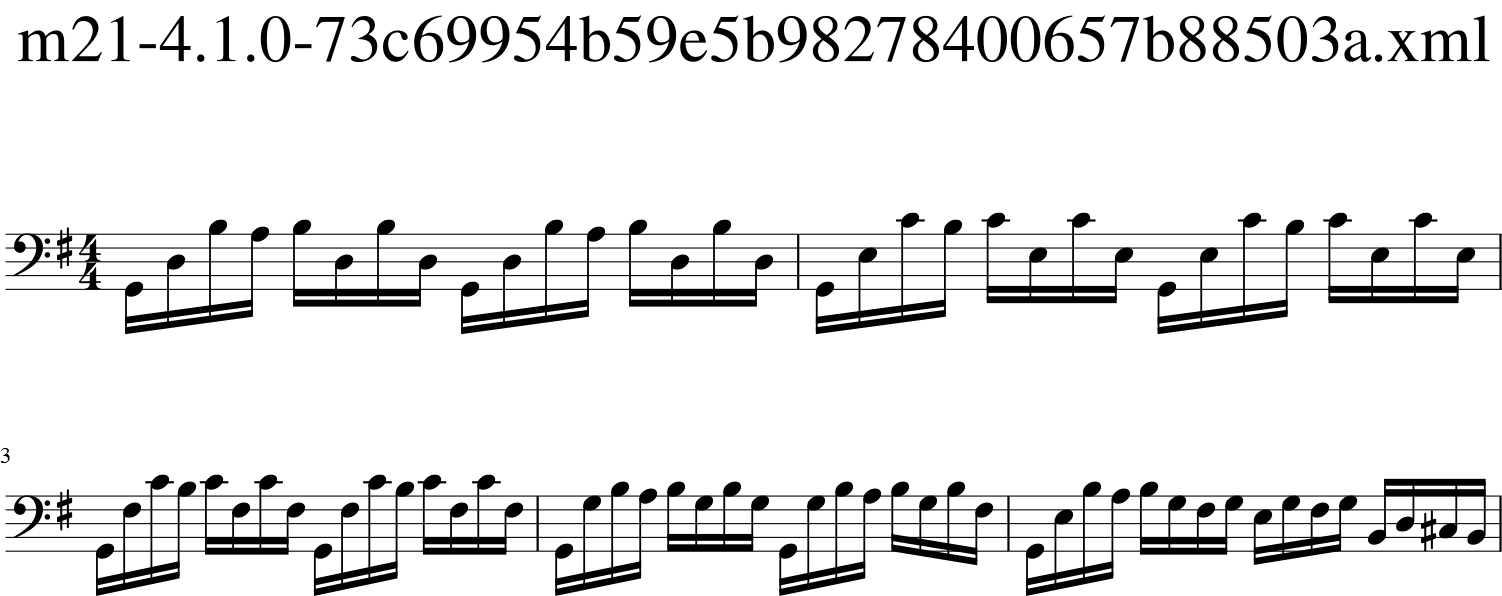

In [7]:
#example for music from url
url = 'http://kern.ccarh.org/cgi-bin/ksdata?l=cc/bach/cello&file=bwv1007-01.krn&f=xml'
sAlt = converter.parse(url)
sAlt.measures(1, 5).show() # show first 5 measures

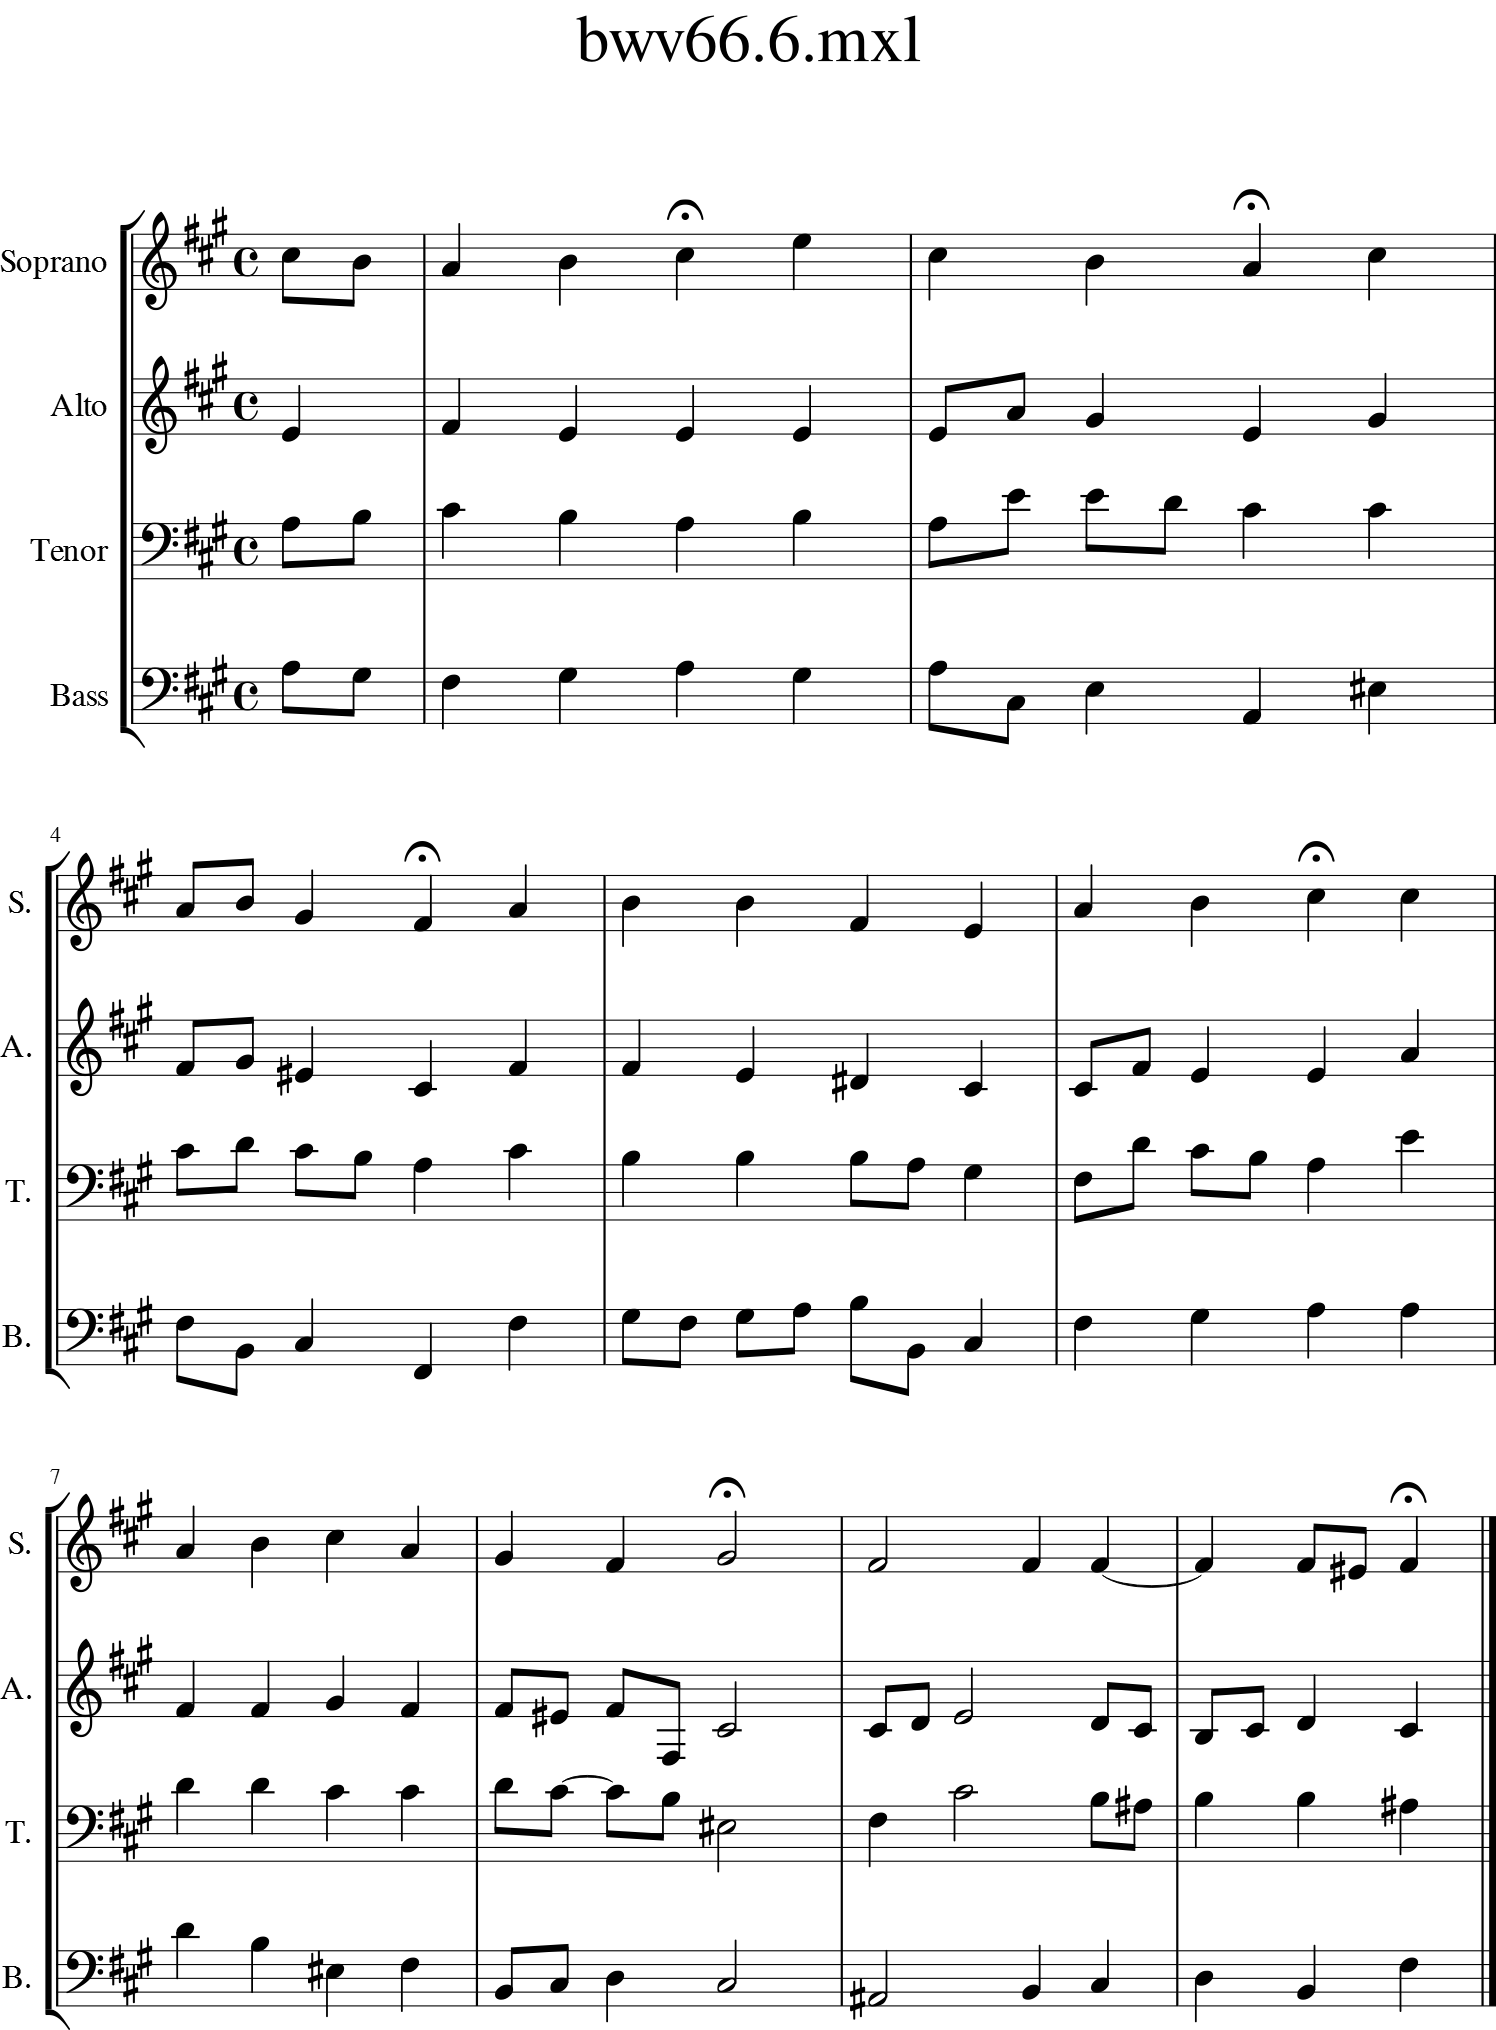

In [9]:
#from stream library
b = corpus.parse('bach/bwv66.6')
b.show() 



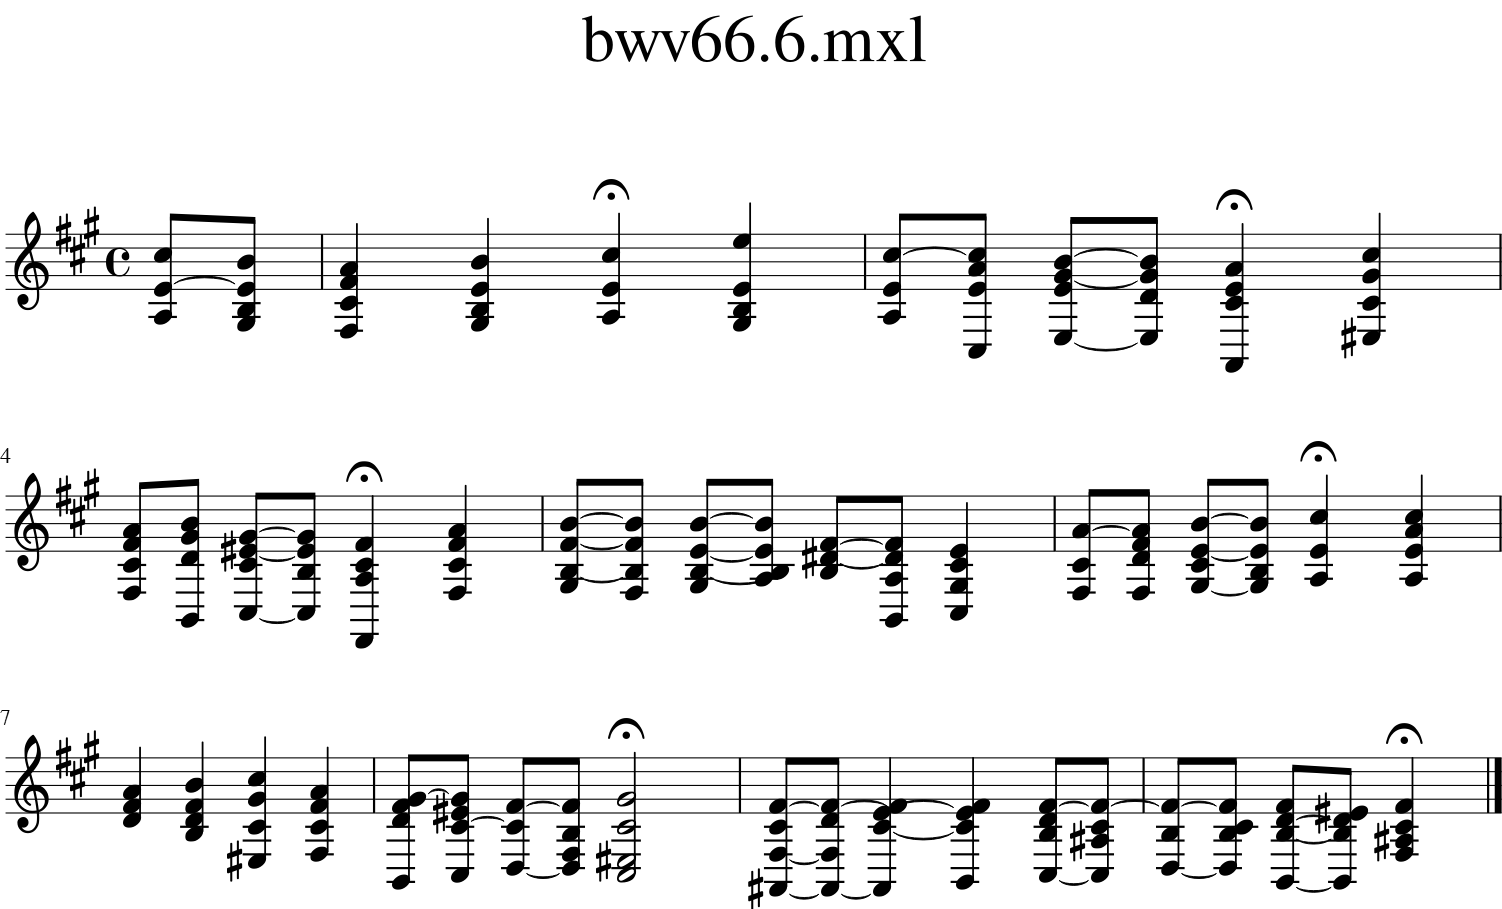

In [11]:
#condense sheet music down into chords
bChords = b.chordify()
bChords.show()

In [13]:
# print locations of all dominant 7 chords (the first part of a cadence)
#format is measureNumber (2) beatStr (2 1/2) chord
for thisChord in bChords.recurse().getElementsByClass('Chord'):
    if thisChord.isDominantSeventh():
        print(thisChord.measureNumber, thisChord.beatStr, thisChord)

2 2 1/2 <music21.chord.Chord B4 G#4 D4 E3>
3 2 1/2 <music21.chord.Chord G#4 E#4 B3 C#3>
4 3 1/2 <music21.chord.Chord F#4 D#4 A3 B2>
8 2 <music21.chord.Chord F#4 E4 C#4 A#2>


In [21]:
# add roman numeral analysis for chordified chordsfor c in bChords.measures(0,2).flat:
if 'Chord' not in c.classes:
    continue
print(c.lyric, end=' ')
    
for c in bChords.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, key.Key('A'))
    c.addLyric(str(rn.figure))

b.measures(0, 2).show()

SyntaxError: 'continue' not properly in loop (<ipython-input-21-c8f19214daa5>, line 3)

In [22]:
#print chord progression, which is stored as a "lyrics" value
for c in bChords.measures(0,2).flat:
    if 'Chord' not in c.classes:
        continue
    print(c.lyric, end=' ')

NameError: name 'bChords' is not defined